In [1]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.8 MB 1.3 MB/s 


In [2]:
import numpy as np
import os,cv2,math,glob,random
import scipy.io as sio
from math import cos, sin
from pathlib import Path
import pandas as pd
import mediapipe
import time
import warnings
warnings.filterwarnings('ignore')
from google.colab.patches import cv2_imshow

### Extracting Dataframe

In [3]:
# get all mat files
mat_list = [Path(f).stem for f in glob.glob("/content/drive/MyDrive/Pose Estimation/AFLW2000/*.mat")]

In [4]:
faceModule = mediapipe.solutions.face_mesh
with faceModule.FaceMesh(static_image_mode=True) as faces:
    xy_list = []
    ypr = []
    img_name = []
    for img in mat_list:
      # loading the image
      image = cv2.imread('/content/drive/MyDrive/Pose Estimation/AFLW2000/'+img+'.jpg')
      #print(image)
      mat_file = sio.loadmat('/content/drive/MyDrive/Pose Estimation/AFLW2000/'+img+'.mat')
     
      # processing the face to extract the landmark points (468 point) for each x,y,z
      results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      if results.multi_face_landmarks != None: 
          img_name.append(img)
          # extracting the labels 3 angels
          pose_para = mat_file["Pose_Para"][0][:3]
          pitch = pose_para[0]
          yaw = pose_para[1]
          roll = pose_para[2]
          ypr = [yaw, pitch, roll]
          # looping over the faces in the image
          for face in results.multi_face_landmarks:
        
              x_list = []
              y_list = []
              for landmark in face.landmark:
                  x = landmark.x
                  y = landmark.y
                  x_list.append(x)
                  y_list.append(y)
              x_list.extend(y_list)
              x_list.extend(ypr)
              xy_list.append(x_list)

In [5]:
Xs = ["x" + str(i) for i in range(468)]
Ys = ["y" + str(i) for i in range(468)]
columns = np.array([Xs,Ys])
columns = list(columns.ravel())
columns.extend(['yaw', 'pitch', 'roll'])

In [6]:
df = pd.DataFrame(xy_list,columns=columns, index = img_name )

In [7]:
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y461,y462,y463,y464,y465,y466,y467,yaw,pitch,roll
image03054,0.536798,0.568343,0.540946,0.540447,0.571973,0.566350,0.543545,0.367969,0.539874,0.543648,...,0.617131,0.621852,0.499001,0.502464,0.504928,0.498331,0.489432,-0.514415,-0.060874,0.110057
image03217,0.506107,0.507294,0.504791,0.487110,0.507517,0.506578,0.502809,0.347802,0.501350,0.501493,...,0.631548,0.633624,0.473823,0.481672,0.488371,0.456836,0.449196,0.039903,-0.192543,-0.027199
image03236,0.503842,0.488899,0.498043,0.468165,0.485042,0.482925,0.480913,0.358855,0.474047,0.469151,...,0.635478,0.638705,0.477285,0.485155,0.491338,0.447866,0.437037,0.205732,-0.241359,-0.150232
image03238,0.506972,0.506463,0.506921,0.485436,0.506197,0.505793,0.504312,0.327292,0.503520,0.502909,...,0.663360,0.662647,0.471195,0.482388,0.493138,0.435863,0.427610,-0.040907,-0.474087,0.019801
image03263,0.456775,0.410104,0.450343,0.408526,0.403161,0.407414,0.429179,0.399436,0.427927,0.419365,...,0.656283,0.657100,0.499583,0.509434,0.518363,0.482681,0.470266,0.684181,-0.446169,-0.270866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
image00892,0.495730,0.489088,0.494932,0.478490,0.488312,0.489977,0.497878,0.378991,0.500944,0.500836,...,0.631167,0.631966,0.487954,0.495226,0.502287,0.472124,0.463398,0.100288,-0.289337,0.003714
image00911,0.506353,0.522493,0.512413,0.504823,0.524586,0.523804,0.517724,0.367916,0.516701,0.518328,...,0.633641,0.634538,0.494372,0.499860,0.505124,0.481968,0.477085,-0.156135,-0.368043,0.077211
image00840,0.523321,0.552240,0.530791,0.537027,0.557136,0.555732,0.546145,0.397602,0.549121,0.555334,...,0.621051,0.623458,0.515065,0.517201,0.519380,0.519421,0.513072,-0.420091,-0.158166,0.207422
image00836,0.450047,0.503570,0.483538,0.539094,0.519141,0.538403,0.585972,0.480743,0.626299,0.647948,...,0.664150,0.660790,0.556884,0.557480,0.561602,0.603781,0.603477,0.074078,-0.304740,0.735418


### Drawings without model

In [36]:
def draw_axis(img, pitch,yaw,roll, tdx=None, tdy=None, size = 100):
    with faceModule.FaceMesh(static_image_mode=False) as faces:
      yaw = -yaw
      if tdx != None and tdy != None:
          tdx = tdx
          tdy = tdy
      else:
        results = faces.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        tdx = int(results.multi_face_landmarks[0].landmark[6].x * img.shape[1])
        tdy = int(results.multi_face_landmarks[0].landmark[6].y * img.shape[0])
        # height, width = img.shape[:2]
        # tdx = width / 2
        # tdy = height / 2

      # X-Axis pointing to right. drawn in red
      x1 = size * (cos(yaw) * cos(roll)) + tdx
      y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

      # Y-Axis | drawn in green
      #        v
      x2 = size * (-cos(yaw) * sin(roll)) + tdx
      y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

      # Z-Axis (out of the screen) drawn in blue
      x3 = size * (sin(yaw)) + tdx
      y3 = size * (-cos(yaw) * sin(pitch)) + tdy

      cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
      cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
      cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

      return img

In [9]:
def draw_landmarks(img):
  random_file = img
  image = cv2.imread('/content/drive/MyDrive/Pose Estimation/AFLW2000/'+random_file+'.jpg')
  #print(img)
  #print(image)
  img_xy = df.loc[img]
  for i in range(468):
    x = img_xy[i]
    y = img_xy[i+468]


    shape = image.shape 
    relative_x = int(x * shape[1])
    relative_y = int(y * shape[0])
    cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
  cv2_imshow(image)
  

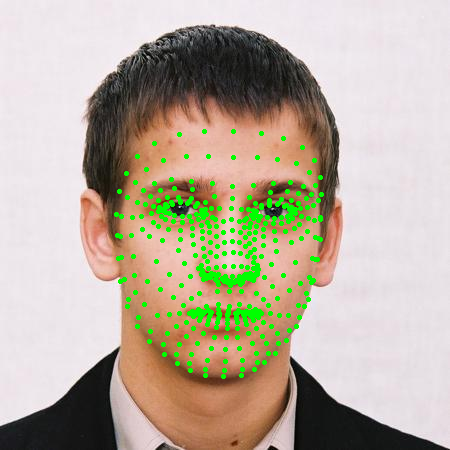

In [10]:
draw_landmarks('image00053')

In [11]:
def draw_pos(img):
  image = cv2.imread('/content/drive/MyDrive/Pose Estimation/AFLW2000/'+img+'.jpg')
  # loading the mat file to extract the 3 angels of the face (pitch,yaw,roll)
  mat_file = sio.loadmat('/content/drive/MyDrive/Pose Estimation/AFLW2000/'+img+'.mat')

  # extracting the labels 3 angels
  pose_para = mat_file["Pose_Para"][0][:3]
  pitch = pose_para[0]
  yaw = pose_para[1]
  roll = pose_para[2]
  print(f'yaw, pitch, roll: {[yaw, pitch, roll]}')
  cv2_imshow(draw_axis(image,pitch,yaw,roll))

yaw, pitch, roll: [-0.09809946, -0.0836698, 0.045110047]


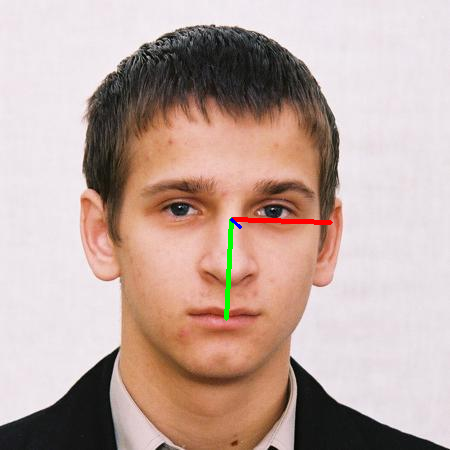

In [12]:
draw_pos('image00053')

### Visualization and Preprocessing

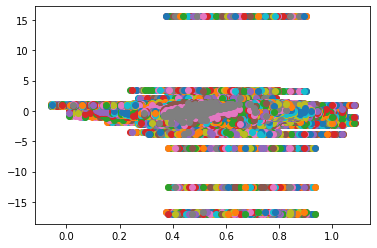

In [13]:
import matplotlib.pyplot as plt
for i in range(936):
    plt.scatter(df.iloc[:,i].values, df.iloc[:,-3].values )
    plt.scatter(df.iloc[:,i].values, df.iloc[:,-2].values )
    plt.scatter(df.iloc[:,i].values, df.iloc[:,-1].values )

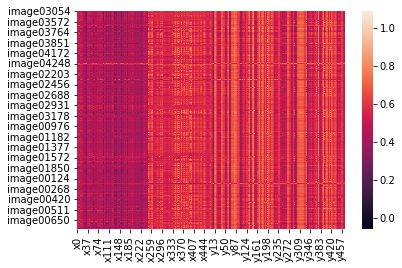

In [14]:
import seaborn as sns
sns.heatmap(df.iloc[:,:-3])

###### PCA

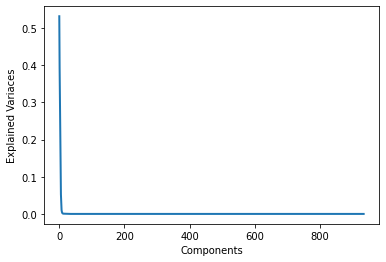

In [15]:
from matplotlib.pyplot import plot, xlabel, ylabel, show
from sklearn.decomposition import PCA
pca2 = PCA().fit(df.iloc[:,:-3])
plot(pca2.explained_variance_, linewidth=2)
xlabel('Components')
ylabel('Explained Variaces')
show()

In [16]:
pca = PCA(n_components=0.95)
pca.fit(df.iloc[:,:-3])

PCA(n_components=0.95)

In [17]:
columns = ['pca_%i' % i for i in range(6)]
df_pca = pd.DataFrame(pca.transform(df.iloc[:,:-3]), columns=columns, index=df.index)
df_pca

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5
image03054,-0.274723,-0.264017,0.631580,-0.395760,-0.108284,0.051214
image03217,-0.015512,-0.649906,0.048248,-0.196809,0.124592,0.152029
image03236,0.352205,-0.533739,-0.175289,0.077483,-0.017135,0.203295
image03238,0.009103,-1.177554,0.047374,-0.047232,0.017343,0.356095
image03263,0.333995,0.087970,-1.001471,0.284896,-0.395628,0.423811
...,...,...,...,...,...,...
image00892,-0.172873,-0.376715,-0.134263,0.105502,0.058476,0.336709
image00911,-0.169469,-0.269753,0.179984,-0.285561,0.079145,0.019195
image00840,-0.524712,0.126132,0.521289,-0.251446,-0.031470,0.008147
image00836,-2.466284,0.486981,0.167126,0.024237,-0.147204,0.327775


### Model

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-3] ,df.iloc[:,-3:] , test_size=0.20, random_state=42)

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

lr = LinearRegression()
rfr = RandomForestRegressor() #0.68
svr = SVR(kernel='rbf', C=1) #0.88  0.84
gbr = GradientBoostingRegressor(n_estimators=50, learning_rate = 0.1) #0.67
ada = AdaBoostRegressor(base_estimator=RandomForestRegressor(random_state=10) ,
                         n_estimators=60, learning_rate = 0.1 
                         ,random_state = 10) #0.79
xgb = XGBRegressor() # 0.77

# SVR without PCA has the greatest accuracy
model = MultiOutputRegressor(estimator=svr)

model.fit(X_train, y_train)
score = model.score(X_train, y_train)
print("Training score:", score)

Training score: 0.46434078433492765


In [20]:
ypred = model.predict(X_test)
ypred.shape

(371, 3)

In [21]:
from sklearn.metrics import r2_score
print("yaw score:%.4f" % r2_score(y_test.iloc[:,0], ypred[:,0]))
print("pitch score:%.4f" % r2_score(y_test.iloc[:,1], ypred[:,1]))
print("roll score:%.4f" % r2_score(y_test.iloc[:,2], ypred[:,2]))

yaw score:0.9511
pitch score:0.7924
roll score:0.9162


In [22]:
r2_score(y_test, ypred)

0.8865401477425152

In [23]:
model.score(X_test , y_test)

0.8865401477425152

In [24]:
X_test.index[0]

'image03808'

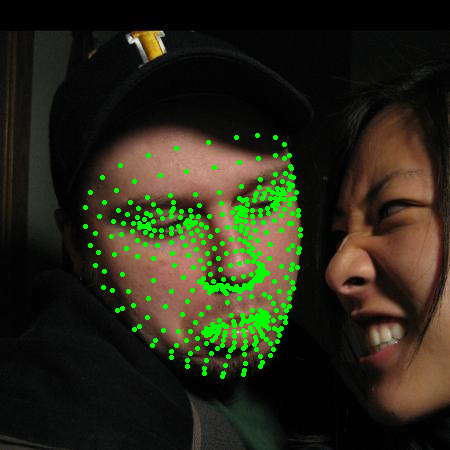

In [25]:
draw_landmarks(X_test.index[2])

yaw, pitch, roll: [-0.24478696, -0.21950772, -0.21133383]


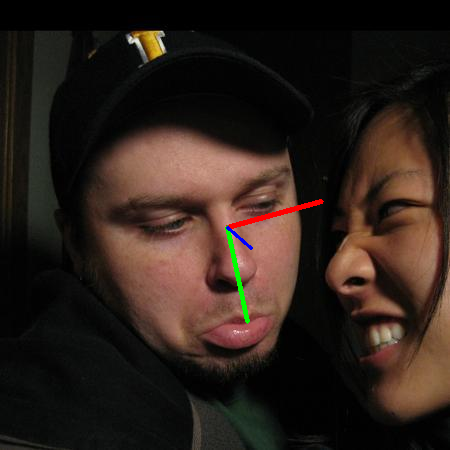

In [26]:
draw_pos(X_test.index[2])

### Drawings with model

In [27]:
def draw_landmarks(img_path, landmarks):
  random_file = img
  image = cv2.imread(img_path)
  #print(image)

  for i in range(468):
    x = landmarks[i]
    y = landmarks[i+468]


    shape = image.shape 
    relative_x = int(x * shape[1])
    relative_y = int(y * shape[0])
    cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
  cv2_imshow(image)
  

### Generate Landmarks mediapipe

In [28]:
#from skimage import io

def generate_landmarks(img_path):

  faceModule = mediapipe.solutions.face_mesh
  with faceModule.FaceMesh(static_image_mode=False) as faces:
      landmarks = []
      # loading the image
      if (type(img_path) == np.ndarray) : 
        image = img_path
      else:
        image = cv2.imread(img_path)
      #image = img_path
      #image = io.imread(img_path)
      # processing the face to extract the landmark points (468 point) for each x,y,z
      results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      if results.multi_face_landmarks != None: 
          # looping over the faces in the image
          for face in results.multi_face_landmarks:
              x_list = []
              y_list = []
              for landmark in face.landmark:
                  x = landmark.x
                  y = landmark.y
                  x_list.append(x)
                  y_list.append(y)
              x_list.extend(y_list)
              landmarks.append(x_list)

  return landmarks

In [30]:
landmarks = generate_landmarks('/content/2022-06-06-163608.jpg')
landmarks = [x for xs in landmarks for x in xs]

In [31]:
len(landmarks)

936

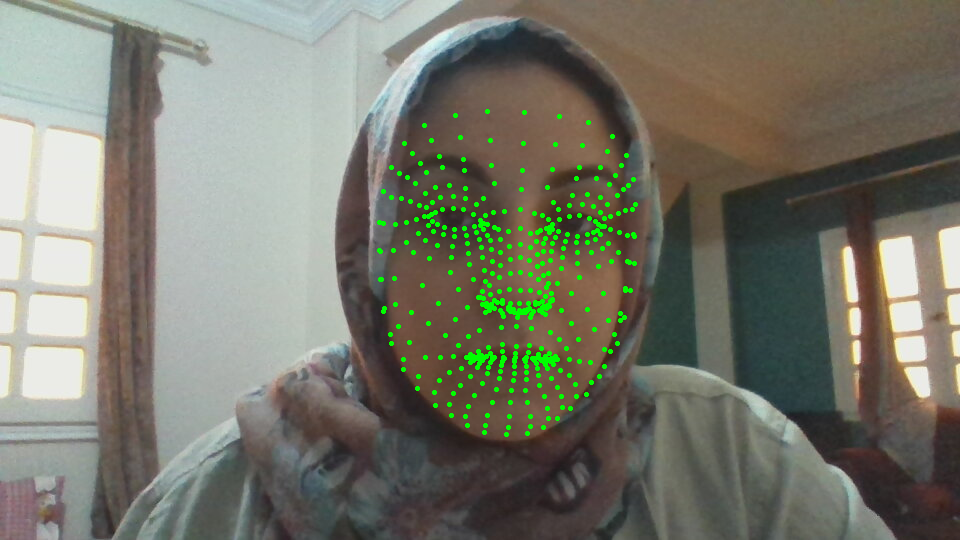

In [32]:
draw_landmarks('/content/2022-06-06-163608.jpg',landmarks )

In [47]:
def draw_pos(img_path, landmarks):
  if (type(img_path) == np.ndarray) : 
        image = img_path
  else:
        image = cv2.imread(img_path)

  #print(image)
  # extracting the labels 3 angels
  ypr = model.predict(landmarks)
  #print(ypr)
  yaw = ypr[0][0]
  pitch = ypr[0][1]
  roll = ypr[0][2]
  print(f'yaw, pitch, roll: {[ypr[0][0], ypr[0][1], ypr[0][2]]}')
  img = draw_axis(image,pitch,yaw,roll)
  return img

In [48]:
landmarks = generate_landmarks('/content/2022-06-06-163619.jpg')

In [49]:
img = draw_pos('/content/2022-06-06-163619.jpg',landmarks)

yaw, pitch, roll: [-0.7788829851460016, -0.2806159274263521, 0.1117227957952868]


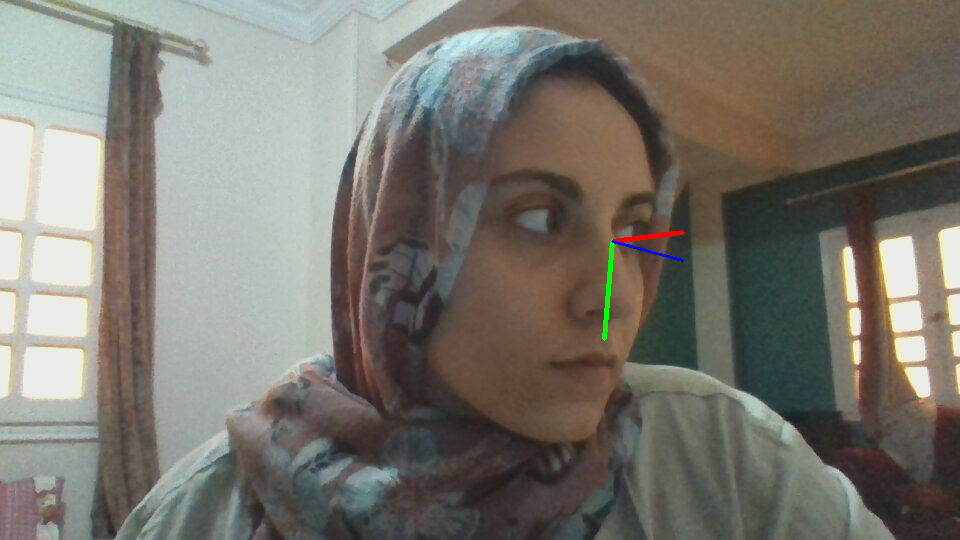

In [51]:
cv2_imshow(img)

### Video

In [52]:
vid = '/content/2022-06-16-171315.webm'
cap = cv2.VideoCapture(vid)

frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(frame_count)

328


In [53]:
img_array = []

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
      #landmarks = generate_landmarks(frame)
      #frame = draw_pos(frame,landmarks) 
      img_array.append(frame)
      height, width, layers = frame.shape
      size  = (width,height)
    else:
      break

out = cv2.VideoWriter('/content/output_video.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
for i in range(len(img_array)):
    landmarks = generate_landmarks(img_array[i])
    out.write(draw_pos(img_array[i],landmarks) )
out.release()

yaw, pitch, roll: [0.11074499124742583, 0.25364555071725126, -0.09019503011795124]
yaw, pitch, roll: [0.10854366515341281, 0.24970204835434104, -0.0870687522483535]
yaw, pitch, roll: [0.1095409770595432, 0.25211098449776415, -0.08779706292966569]
yaw, pitch, roll: [0.11026886689639322, 0.2537704374091362, -0.08767199836501713]
yaw, pitch, roll: [0.1085039974179179, 0.25157805471503547, -0.08713226737314825]
yaw, pitch, roll: [0.11246826951436024, 0.2612996327425905, -0.08848802180026835]
yaw, pitch, roll: [0.11592179544231747, 0.26349107587027254, -0.09450492373818783]
yaw, pitch, roll: [0.11619478213942099, 0.26054483370949155, -0.0939964002511898]
yaw, pitch, roll: [0.11147909212924552, 0.26424783776336735, -0.08977315119441251]
yaw, pitch, roll: [0.11342554137577505, 0.2643029579566716, -0.09402580273310943]
yaw, pitch, roll: [0.11608969177304392, 0.26202491953948137, -0.09482373207676839]
yaw, pitch, roll: [0.11375742010540286, 0.25588072411256313, -0.09439085846254833]
yaw, pitch,